In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline 

In [174]:
#load the data
df=pd.read_csv("Wholesale_customers_data.csv")

In [175]:
#take a look at the dataframe
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [176]:
df.shape

(440, 8)

In [177]:
#know about the columns and the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [178]:
#check missing value
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [179]:
#check feature Region
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [180]:
#check feature channel
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [181]:
#encode channel and region, so total 6 combinations.
df.loc[df['Channel']==1, 'Horeca']=1
df.loc[df['Channel']!=1, 'Horeca']=0
df.loc[df['Channel']==2, 'Retail']=1
df.loc[df['Channel']!=2, 'Retail']=0
df.loc[df['Region']==1, 'Lisbon']=1
df.loc[df['Region']!=1, 'Lisbon']=0
df.loc[df['Region']==2, 'Oporto']=1
df.loc[df['Region']!=2, 'Oporto']=0
df.loc[df['Region']==3, 'Others']=1
df.loc[df['Region']!=3, 'Others']=0

In [182]:
#check the new dataframe
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,2,3,12669,9656,7561,214,2674,1338,0.0,1.0,0.0,0.0,1.0
1,2,3,7057,9810,9568,1762,3293,1776,0.0,1.0,0.0,0.0,1.0
2,2,3,6353,8808,7684,2405,3516,7844,0.0,1.0,0.0,0.0,1.0
3,1,3,13265,1196,4221,6404,507,1788,1.0,0.0,0.0,0.0,1.0
4,2,3,22615,5410,7198,3915,1777,5185,0.0,1.0,0.0,0.0,1.0
5,2,3,9413,8259,5126,666,1795,1451,0.0,1.0,0.0,0.0,1.0
6,2,3,12126,3199,6975,480,3140,545,0.0,1.0,0.0,0.0,1.0
7,2,3,7579,4956,9426,1669,3321,2566,0.0,1.0,0.0,0.0,1.0
8,1,3,5963,3648,6192,425,1716,750,1.0,0.0,0.0,0.0,1.0
9,2,3,6006,11093,18881,1159,7425,2098,0.0,1.0,0.0,0.0,1.0


## Exploratory Data Analysis

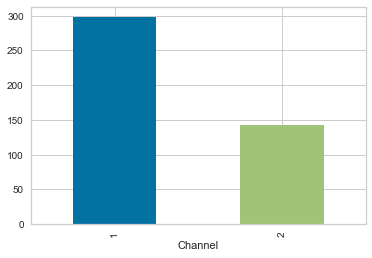

In [183]:
#channel distribution
df.groupby(df['Channel'])['Fresh'].count().plot.bar()

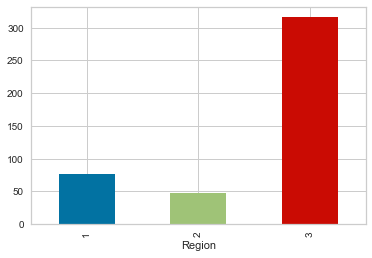

In [184]:
#region distribution
df.groupby(df['Region'])['Fresh'].count().plot.bar()

In [185]:
df=df.drop(['Channel','Region'], axis=1)

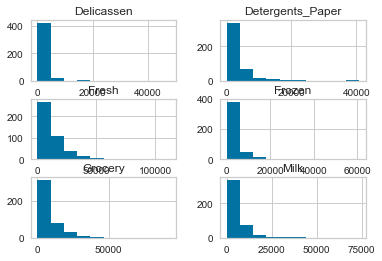

In [186]:
#numerical variables distribution
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].hist()
plt.show()
#right skewed

In [187]:
from sklearn import cluster, datasets, decomposition, preprocessing
#from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

## Data Preprocessing
### Normalize and scale all variables to make sure 
1. all continous variables are nomally distributed;
2. all variables are on the same scale.

In [188]:
normalized = preprocessing.quantile_transform(df, output_distribution='normal')

In [189]:
#normaalize and scale data
scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(normalized)
scaled = scaler.transform(normalized)

/Users/charliew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


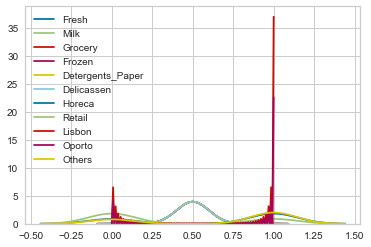

In [190]:
#visualization to see how are the variables looking after processing
import seaborn as sns
df_scaled = pd.DataFrame(scaled, columns=df.columns)
for i in df.columns:
    sns.kdeplot(df_scaled[i])

In [191]:
#dataframe after preprocessing
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,0.540545,0.595093,0.536922,0.360146,0.545195,0.531606,0.0,1.0,0.0,0.0,1.0
1,0.485370,0.598476,0.555364,0.510730,0.551559,0.561867,0.0,1.0,0.0,0.0,1.0
2,0.479240,0.588265,0.539070,0.533305,0.556677,0.719226,0.0,1.0,0.0,0.0,1.0
3,0.544054,0.414036,0.491500,0.612644,0.476995,0.563906,1.0,0.0,0.0,0.0,1.0
4,0.602516,0.536195,0.533324,0.572459,0.531618,0.678441,0.0,1.0,0.0,0.0,1.0


## Modeling

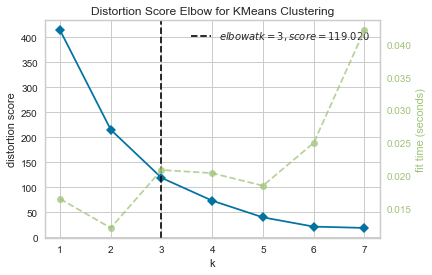

In [192]:
# use elbow method to find a good k
vis=KElbowVisualizer(KMeans(), k=(1,8))
vis.fit(df_scaled)
vis.show()

In [193]:
#according to the elbow plot, we choose k=3 to do clustering
clusterer = KMeans(n_clusters=3, random_state=0)
cluster_labels = clusterer.fit_predict(df_scaled)
df['cluster'] = cluster_labels

In [194]:
#check the cluster distribution
df.groupby(df['cluster'], as_index=False)["Fresh"].count()

,cluster,Fresh
0,0,211
1,1,87
2,2,142


In [195]:
#cluster statistics summary
df_3 = df.groupby(df['cluster'], as_index=False).mean()
df_3

,cluster,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,0,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360,1.0,0.0,0.000000,0.000000,1.000000
1,1,12499.402299,3366.218391,4145.011494,3969.804598,799.965517,1167.781609,1.0,0.0,0.678161,0.321839,0.000000
2,2,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,0.0,1.0,0.126761,0.133803,0.739437


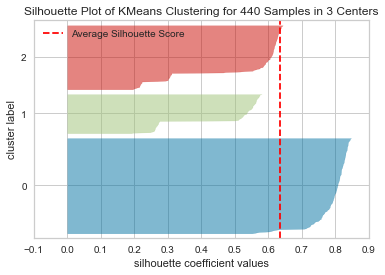

In [196]:
# evaluate model by silhouette score
vis2=SilhouetteVisualizer(clusterer, colors='yellowbrick')
vis2.fit(df_scaled)
vis2.show()

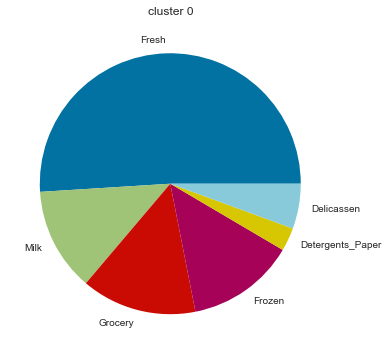

In [197]:
#draw pie chart to learn properties of each cluster
i=0
d=df_3[df_3['cluster']==i][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label=d.columns.tolist()
values=d.iloc[0]
plt.figure(figsize=(6,6))
plt.pie(x=values,labels=label)
plt.title('cluster %s'%str(i))
plt.show()
i+=1

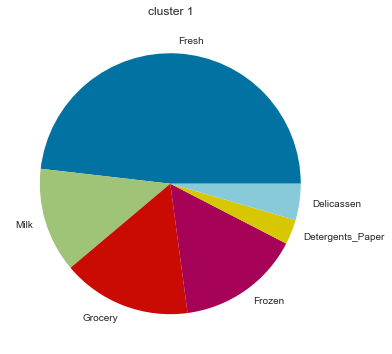

In [198]:
d=df_3[df_3['cluster']==i][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label=d.columns.tolist()
values=d.iloc[0]
plt.figure(figsize=(6,6))
plt.pie(x=values,labels=label)
plt.title('cluster %s'%str(i))
plt.show()
i+=1

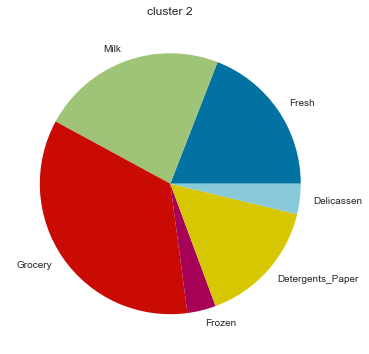

In [199]:
d=df_3[df_3['cluster']==i][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label=d.columns.tolist()
values=d.iloc[0]
plt.figure(figsize=(6,6))
plt.pie(x=values,labels=label)
plt.title('cluster %s'%str(i))
plt.show()
i+=1

## Property of each cluster
Cluster 0: Customers are mostly from Hotel/Restaurant/Cafe channel. They are from region Lisbon and Oporto. They spend major on Fresh, more on Milk, Grocery and Frozen. They spend less on Delicassen and Detergents_Paper.

Cluster 1: Customers are mostly from Hotel/Restaurant/Cafe channel. They are from region Others. They spend more on Fresh, Frozen, Grocery and Milk. They spend less on Delicassen and Detergents_Paper.

Cluster 2: Customers are mostly from Retail channel. They spend mostly on Milk, Grocery, Fresh and Detergents_Paper. They spend less on Delicassen and Frozen.

In [200]:
#according to the dataset, there are 6 different combinations of channels and regions, we can try 6 clusters
clusterer = KMeans(n_clusters=6, random_state=0)
cluster_labels = clusterer.fit_predict(df_scaled)
df['cluster'] = cluster_labels

In [201]:
df.groupby(df['cluster'], as_index=False)["Fresh"].count()

,cluster,Fresh
0,0,211
1,1,59
2,2,105
3,3,18
4,4,28
5,5,19


In [202]:
df_6 = df.groupby(df['cluster'], as_index=False).mean()
df_6

,cluster,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,0,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360,1.0,0.0,0.0,0.0,1.0
1,1,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542,1.0,0.0,1.0,0.0,0.0
2,2,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524,0.0,1.0,0.0,0.0,1.0
3,3,5200.000000,10784.000000,18471.944444,2584.111111,8225.277778,1871.944444,0.0,1.0,1.0,0.0,0.0
4,4,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857,1.0,0.0,0.0,1.0,0.0
5,5,7289.789474,9190.789474,16326.315789,1540.578947,8410.263158,1239.000000,0.0,1.0,0.0,1.0,0.0


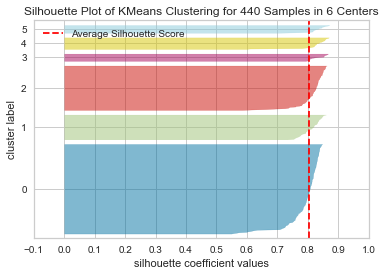

In [203]:
vis2=SilhouetteVisualizer(clusterer,colors='yellowbrick')
vis2.fit(df_scaled)
vis2.show()

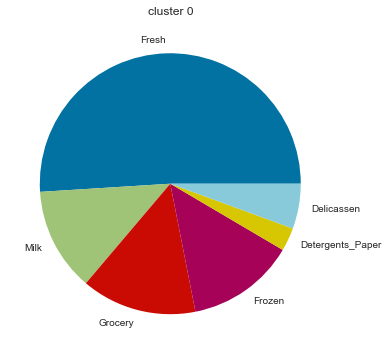

In [204]:
#draw pie chart to learn properties of each cluster
i=0
d=df_6[df_6['cluster']==i][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label=d.columns.tolist()
values=d.iloc[0]
plt.figure(figsize=(6,6))
plt.pie(x=values,labels=label)
plt.title('cluster %s'%str(i))
plt.show()
i+=1

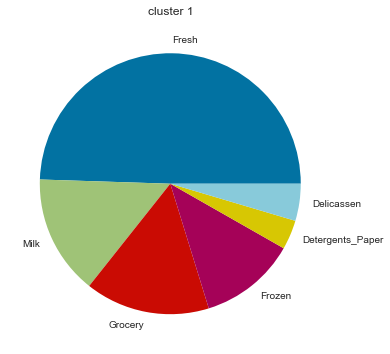

In [205]:
d=df_6[df_6['cluster']==i][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label=d.columns.tolist()
values=d.iloc[0]
plt.figure(figsize=(6,6))
plt.pie(x=values,labels=label)
plt.title('cluster %s'%str(i))
plt.show()
i+=1

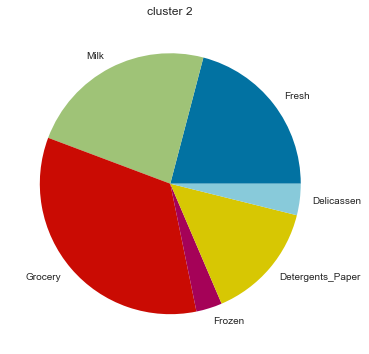

In [206]:
d=df_6[df_6['cluster']==i][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label=d.columns.tolist()
values=d.iloc[0]
plt.figure(figsize=(6,6))
plt.pie(x=values,labels=label)
plt.title('cluster %s'%str(i))
plt.show()
i+=1

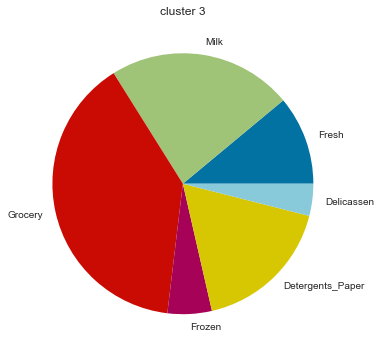

In [207]:
d=df_6[df_6['cluster']==i][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label=d.columns.tolist()
values=d.iloc[0]
plt.figure(figsize=(6,6))
plt.pie(x=values,labels=label)
plt.title('cluster %s'%str(i))
plt.show()
i+=1

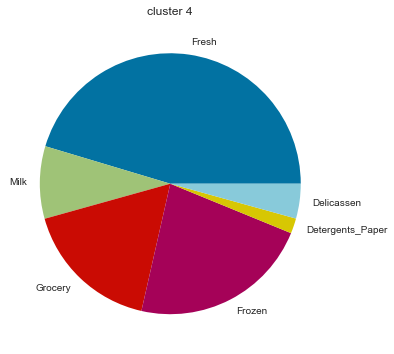

In [208]:
d=df_6[df_6['cluster']==i][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label=d.columns.tolist()
values=d.iloc[0]
plt.figure(figsize=(6,6))
plt.pie(x=values,labels=label)
plt.title('cluster %s'%str(i))
plt.show()
i+=1

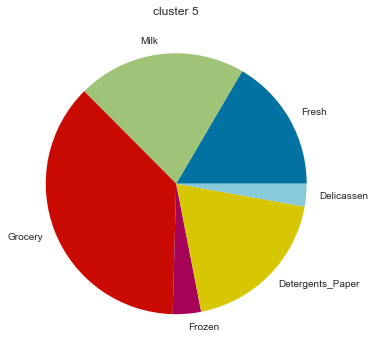

In [209]:
d=df_6[df_6['cluster']==i][['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
label=d.columns.tolist()
values=d.iloc[0]
plt.figure(figsize=(6,6))
plt.pie(x=values,labels=label)
plt.title('cluster %s'%str(i))
plt.show()
i+=1

## Property of each cluster
Cluster 0: Customers are from Hotel/Restaurant/Cafe channel. They are from region Others. They spend mainly on Fresh, more on Milk, Grocery and Frozen. They spend less on Detergents_Paper and Delicassen.

Cluster 1: Customers are from Hotel/Restaurant/Cafe channel. They are from region Lisbon. They spend more on Fresh, Milk and Grocery. They spend less on Detergents_Paper and Delicassen.

Cluster 2: Customers are from Retail channel. They are from region Others. They spend mostly on Milk and Grocery, more on Detergents_Paper and Fresh. They spend less on Frozen and Delicassen.

Cluster 3: Customers are from Retail channel. They are from region Lisbon. They spend major on Grocery, more on Detergents_Paper and Milk. They spend less on Frozen and Delicassen.

Cluster 4: Customers are from Hotel/Restaurant/Cafe channel. They are from region Oporto. They spend major on Fresh, more on Grocery and Frozen. They spend less on Detergents_Paper and Delicassen.

Cluster 5: Customers are from Retail channel. They are from region Oporto. They spend more on Grocery, Detergents_Paper and Milk. They spend less on Frozen and Delicassen.